#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.outliers_influence as sms
from statsmodels.tools.tools import add_constant

from patsy.contrasts import ContrastMatrix
from patsy.contrasts import Poly
%matplotlib inline

In [2]:
data = pd.read_csv('gallup.csv')

In [3]:
data['Phallusx'] = data['Phallus'].replace({'No Coronal Ridge':1,'Minimal Coronal Ridge':2, 'Coronal Ridge':3  })

In [4]:
data

,Phallus,Displacement,Phallusx
0,No Coronal Ridge,21.487603,1
1,No Coronal Ridge,35.830619,1
2,No Coronal Ridge,61.744966,1
3,No Coronal Ridge,22.014925,1
4,No Coronal Ridge,35.497836,1
5,Minimal Coronal Ridge,93.117409,2
6,Minimal Coronal Ridge,80.769231,2
7,Minimal Coronal Ridge,91.056911,2
8,Minimal Coronal Ridge,97.435897,2
9,Minimal Coronal Ridge,93.165468,2


In [5]:
dummies = pd.get_dummies(data['Phallusx'])
dummy = dummies.iloc[:,1: ]
dummy.columns = ['low', 'high']
dummy

,low,high
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [6]:
data = pd.merge(data, dummy, how = 'inner', left_index = True, right_index = True)

In [7]:
data = add_constant(data)
data.head()

,const,Phallus,Displacement,Phallusx,low,high
0,1.0,No Coronal Ridge,21.487603,1,0,0
1,1.0,No Coronal Ridge,35.830619,1,0,0
2,1.0,No Coronal Ridge,61.744966,1,0,0
3,1.0,No Coronal Ridge,22.014925,1,0,0
4,1.0,No Coronal Ridge,35.497836,1,0,0


In [8]:
m01  = ols('Displacement~low+high', data=data).fit()

In [9]:
m01.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     41.56
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           4.03e-06
Time:                        19:46:32   Log-Likelihood:                -55.828
No. Observations:                  15   AIC:                             117.7
Df Residuals:                      12   BIC:                             119.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3152      5.002      7.060      0.000      24.417      46.213
low           55.7938      7.074      7.887      0.000      40.381      71.206
high          55.9074      7.074      7.904      0.000      40.495      71.320
==============================================================================
Omnibus:                        4.867   Durbin-Watson:                   2.478
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.189
Skew:                           0.803   Prob(JB):                        0.335
Kurtosis:                       3.960   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking homogeneity of variance using levene test

In [10]:
data_1 = data[data['Phallusx']==1]
data_2 = data[data['Phallusx']==2]
data_3 = data[data['Phallusx']==3]

In [11]:
stat, p = st.levene(data_1['Displacement'], data_2['Displacement'], data_3['Displacement'])
print(stat, p)

1.1516046614783768 0.34872775150178337


#### dataset analysis

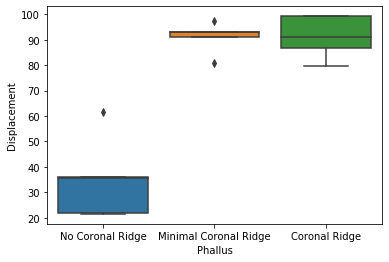

In [12]:
_ = sns.boxplot(x='Phallus', y='Displacement', data=data)

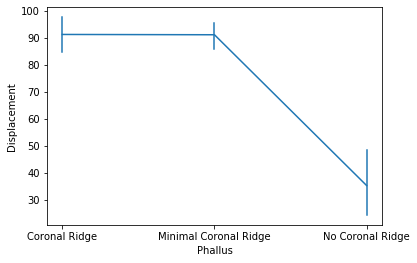

In [13]:
_ = sns.lineplot(x='Phallus', y='Displacement', data=data, err_style='bars')

#### Anova

In [14]:
model  = ols('Displacement~C(Phallus)', data=data).fit()

In [15]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Phallus),2.0,10397.657466,5198.828733,41.559379,0.000004
Residual,12.0,1501.127937,125.093995,NaN,NaN


In [16]:
prediction = pd.DataFrame(model.fittedvalues)
prediction.columns = ['predicted'] 
prediction.head()

,predicted
0,35.31519
1,35.31519
2,35.31519
3,35.31519
4,35.31519


In [17]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [18]:
summary_frame = sms.OLSInfluence(model).summary_frame()

In [19]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

In [20]:
summary_frame .head()

,dfb_Intercept,dfb_C(Phallus)[T.Minimal Coronal Ridge],dfb_C(Phallus)[T.No Coronal Ridge],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,predicted,standarized_prediction
0,-2.966541e-15,-1.048831e-15,-0.510272,0.159215,-1.382239,0.2,-0.691120,-1.443266,-0.721633,35.31519,-1.366258
1,-2.720450e-15,-9.618243e-16,0.017443,0.000221,0.051524,0.2,0.025762,0.049335,0.024668,35.31519,-1.366258
2,-4.205668e-15,-2.230392e-15,1.382717,0.581674,2.641985,0.2,1.320992,3.910914,1.955457,35.31519,-1.366258
3,-2.945747e-15,-1.041479e-15,-0.487372,0.147303,-1.329527,0.2,-0.664763,-1.378496,-0.689248,35.31519,-1.366258
4,-2.720187e-15,-1.442597e-15,0.006180,0.000028,0.018258,0.2,0.009129,0.017481,0.008740,35.31519,-1.366258


#### checking anova assumptions are met or not

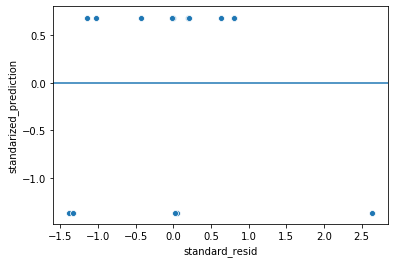

In [21]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

### The plot we have shows points that are equally spread for the three groups, which implies that variances are similar across groups (which was also the conclusion reached by Levene’s test

In [22]:
st.shapiro(data['Displacement'])

(0.7985606789588928, 0.0035234233364462852)

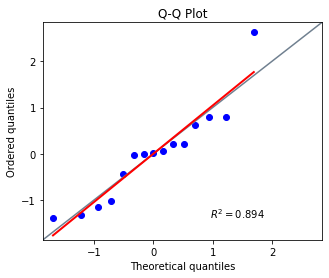

In [23]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

### The second plot is a Q-Q plot and shapiro-wilk test , which tells us something about the normality of residuals in the model. We want our residuals to be normally distributed, which means that the dots on the graph should cling lovingly to the diagonal line. Ours look like they have had a bit of an argument with the diagonal line, which suggests that we may not be able to assume normality of errors and should perhaps use a robust version of ANOVA instead

In [24]:
aov = pg.welch_anova(dv='Displacement', between='Phallusx', data=data)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,Phallusx,2,7.308604,24.48803,0.000576,0.873842


## Robust anova

In [25]:
st.kruskal(data_1['Displacement'], data_2['Displacement'], data_3['Displacement'])

KruskalResult(statistic=9.379999999999995, pvalue=0.009186686156244689)

#### significant from robust anova too

## Planned Comparisons

In [26]:
contrast1 = [-2,1,1]
contrast2 = [0,-1,1]

In [27]:
contrast = np.vstack((contrast1, contrast2))

In [28]:
contrast = contrast.T

In [29]:
print(contrast)

[[-2  0]
 [ 1 -1]
 [ 1  1]]


In [30]:
mod_custom = ols("Displacement ~ C(Phallusx, contrast)", data=data)
res_custom = mod_custom.fit()
print(res_custom.summary())

                            OLS Regression Results                            
Dep. Variable:           Displacement   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     41.56
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           4.03e-06
Time:                        19:46:39   Log-Likelihood:                -55.828
No. Observations:                  15   AIC:                             117.7
Df Residuals:                      12   BIC:                             119.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### Contrast 1 tells us that hypothesis 1 is supported: having some kind of ridge led to greater sperm  displacement  than  not  having  a  ridge, t(12)  =  9.12, p < .001. Contrast 2 shows that hypothesis  2  is  not  supported:  the  amount  of  sperm  displaced  by  the  normal  coronal  ridge was not significantly different from the amount displaced by a minimal coronal ridge, t(12)  = 0.02, p = .99. 

## Trend analysis

In [31]:
levels = data.Phallusx.unique().tolist()
contrast = Poly().code_without_intercept(levels)
print(contrast.matrix)

[[-7.07106781e-01  4.08248290e-01]
 [-4.43378006e-17 -8.16496581e-01]
 [ 7.07106781e-01  4.08248290e-01]]


In [32]:
mod_poly = ols("Displacement~ C(Phallusx, Poly)", data=data)
res_poly = mod_poly.fit()
print(res_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           Displacement   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     41.56
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           4.03e-06
Time:                        19:46:39   Log-Likelihood:                -55.828
No. Observations:                  15   AIC:                             117.7
Df Residuals:                      12   BIC:                             119.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### The main ANOVA tells us that there was a significant effect of the type of phallus, F(2, 12) = 41.56, p <.001. (This is exactly the same result as reported in the paper on page 280.) The is a significant linear trend, t(12) = 7.90, p < .001, indicating that more sperm was displaced as the  ridge  increased  (however,  note  from  the  graph  that  this  effect  reflects  the  increase  in displacement  as  we  go  from  no  ridge  to  having  a  ridge;  there  is  no  extra  increase  from ‘minimal  ridge’  to  ‘coronal  ridge’). There is also  a  significant  quadratic  trend,  indicating  that the pattern of means is curvilinear (i.e., is represented by a curve that has one bend), t(12) = −4.55, p<.001. This suggests that having a coronal  ridge  compared  to  having  no  coronal ridge enhances semen displacement but then as the coronal ridge increases beyond a certain point the percentage semen displacement decreases again. This makes sense when looking at  the  error  bar  graph,  there  was  very little  difference  between  ‘minimal  coronal  ridge’  and ‘coronal ridge’.